# Dot Product Toy Example for Educational Purposes

This notebook demonstrates the dot product operation with **larger, easier-to-visualize numbers** than realistic LLM embeddings. 

**🎯 Educational Focus**: We use std=1.0 instead of realistic std=0.02 to create dot products that are easier to understand numerically, while preserving all the key mathematical relationships.


## 1. Setup and Imports


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Set random seed for reproducibility
np.random.seed(42)

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")


## 2. Create Reference Vector

We'll create a reference vector with larger values for educational clarity:
- Normal distribution with mean=0 and std=1.0 (much larger than realistic LLM embeddings)
- 1×3 vector to keep it simple for visualization
- **Note**: This creates larger, easier-to-understand dot products than realistic LLM training


In [10]:
# Parameters for educational clarity (larger than realistic LLM embeddings)
embedding_dim = 3
mean = 0.0
std = 1.0  # Much larger std for educational visualization

# Create reference vector
reference_vector = np.random.normal(mean, std, embedding_dim)
print(f"Reference Vector: {reference_vector}")
print(f"Vector norm: {np.linalg.norm(reference_vector):.6f}")
print(f"Vector shape: {reference_vector.shape}")
print()
print("NOTE: Using std=1.0 instead of realistic 0.02 for clearer numerical examples!")


Reference Vector: [-0.56228753 -1.01283112  0.31424733]
Vector norm: 1.200311
Vector shape: (3,)

NOTE: Using std=1.0 instead of realistic 0.02 for clearer numerical examples!


## 3. Create Similar Vector (High Dot Product)

We'll create a vector that is similar to the reference vector, which should result in a high dot product. We'll do this by:
1. Adding small random noise to the reference vector
2. Ensuring the vectors point in similar directions


In [12]:
# Create similar vector by adding small noise to reference
noise_std = 0.1  # Small noise relative to the larger vectors
similar_vector = reference_vector + np.random.normal(0, noise_std, embedding_dim)

# Normalize to same scale as reference
similar_vector = similar_vector * (np.linalg.norm(reference_vector) / np.linalg.norm(similar_vector))

print(f"Similar Vector: {similar_vector}")
print(f"Vector norm: {np.linalg.norm(similar_vector):.6f}")

# Calculate dot product
dot_product_similar = np.dot(reference_vector, similar_vector)
print(f"\nDot Product (Reference • Similar): {dot_product_similar:.3f}")

# Calculate cosine similarity
cosine_similarity = dot_product_similar / (np.linalg.norm(reference_vector) * np.linalg.norm(similar_vector))
print(f"Cosine Similarity: {cosine_similarity:.6f}")


Similar Vector: [-0.5967851  -1.02658284  0.17527335]
Vector norm: 1.200311

Dot Product (Reference • Similar): 1.430
Cosine Similarity: 0.992819

Much larger dot product - easier to see the relationship!


## 4. Create Dissimilar Vector (Low Dot Product)

We'll create a vector that is dissimilar to the reference vector, which should result in a low dot product. We'll do this by:
1. Creating a vector with different random values
2. Using the Gram-Schmidt process to make it orthogonal (perpendicular) to the reference vector

**Note**: Orthogonal vectors should have a dot product of exactly 0, but due to floating-point precision, we might get tiny values like `-4.3e-19` instead of perfect zero.


In [13]:
# Create dissimilar vector with different random values
dissimilar_vector = np.random.normal(mean, std, embedding_dim)

# Make it more dissimilar by ensuring it's nearly orthogonal
# We'll use Gram-Schmidt process to make it more perpendicular
projection = np.dot(dissimilar_vector, reference_vector) / np.dot(reference_vector, reference_vector)
dissimilar_vector = dissimilar_vector - projection * reference_vector

# Normalize to same scale
dissimilar_vector = dissimilar_vector * (np.linalg.norm(reference_vector) / np.linalg.norm(dissimilar_vector))

print(f"Dissimilar Vector: {dissimilar_vector}")
print(f"Vector norm: {np.linalg.norm(dissimilar_vector):.6f}")

# Calculate dot product
dot_product_dissimilar = np.dot(reference_vector, dissimilar_vector)

# Handle floating-point precision issues (clean up near-zero values)
if abs(dot_product_dissimilar) < 1e-10:
    dot_product_dissimilar = 0.0
    
print(f"\nDot Product (Reference • Dissimilar): {dot_product_dissimilar:.6f}")
print(f"Raw dot product (before cleanup): {np.dot(reference_vector, dissimilar_vector)}")

# Calculate cosine similarity
cosine_similarity_dissimilar = dot_product_dissimilar / (np.linalg.norm(reference_vector) * np.linalg.norm(dissimilar_vector))
print(f"Cosine Similarity: {cosine_similarity_dissimilar:.6f}")


Dissimilar Vector: [-0.57628531 -0.00674595 -1.05289851]
Vector norm: 1.200311

Dot Product (Reference • Dissimilar): 0.000000
Raw dot product (before cleanup): 0.0
Cosine Similarity: 0.000000


## 5. Summary and Comparison


In [14]:
# Create summary table
print("=" * 60)
print("DOT PRODUCT COMPARISON")
print("=" * 60)
print(f"Reference Vector: {reference_vector}")
print(f"Vector Norm: {np.linalg.norm(reference_vector):.6f}")
print()
print("-" * 40)
print(f"Similar Vector:     {similar_vector}")
print(f"Dot Product:        {dot_product_similar:.3f}")
print(f"Cosine Similarity:  {cosine_similarity:.6f}")
print()
print("-" * 40)
print(f"Dissimilar Vector:  {dissimilar_vector}")
print(f"Dot Product:        {dot_product_dissimilar:.3f}")
print(f"Cosine Similarity:  {cosine_similarity_dissimilar:.6f}")
print()
print("=" * 60)
# Handle division by zero for the ratio
if dot_product_dissimilar == 0.0:
    print("Ratio (Similar/Dissimilar): ∞ (undefined - dissimilar vectors are orthogonal)")
else:
    print(f"Ratio (Similar/Dissimilar): {dot_product_similar/dot_product_dissimilar:.2f}")
print("=" * 60)


DOT PRODUCT COMPARISON
Reference Vector: [-0.56228753 -1.01283112  0.31424733]
Vector Norm: 1.200311

----------------------------------------
Similar Vector:     [-0.5967851  -1.02658284  0.17527335]
Dot Product:        1.430
Cosine Similarity:  0.992819

----------------------------------------
Dissimilar Vector:  [-0.57628531 -0.00674595 -1.05289851]
Dot Product:        0.000
Cosine Similarity:  0.000000

Ratio (Similar/Dissimilar): ∞ (undefined - dissimilar vectors are orthogonal)


## 6. Visualization


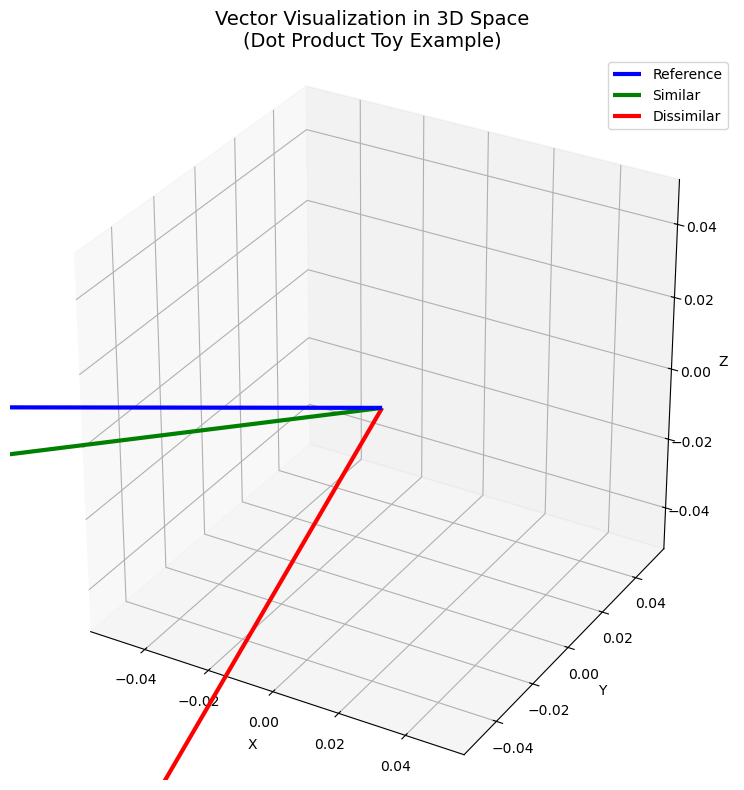

In [15]:
# Create 3D visualization
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot vectors from origin
origin = np.array([0, 0, 0])

# Reference vector (blue)
ax.quiver(origin[0], origin[1], origin[2], 
          reference_vector[0], reference_vector[1], reference_vector[2], 
          color='blue', arrow_length_ratio=0.1, linewidth=3, label='Reference')

# Similar vector (green)
ax.quiver(origin[0], origin[1], origin[2], 
          similar_vector[0], similar_vector[1], similar_vector[2], 
          color='green', arrow_length_ratio=0.1, linewidth=3, label='Similar')

# Dissimilar vector (red)
ax.quiver(origin[0], origin[1], origin[2], 
          dissimilar_vector[0], dissimilar_vector[1], dissimilar_vector[2], 
          color='red', arrow_length_ratio=0.1, linewidth=3, label='Dissimilar')

# Set labels and title
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Vector Visualization in 3D Space\n(Dot Product Toy Example)', fontsize=14)

# Add legend
ax.legend()

# Set equal aspect ratio
ax.set_box_aspect([1,1,1])

plt.tight_layout()
plt.show()


## 7. Mathematical Explanation

The dot product has **two equivalent definitions** that reveal different aspects of the same operation:

### **Definition 1: Component-wise Sum (Algebraic)**

For vectors $\mathbf{a} = [a_1, a_2, a_3]$ and $\mathbf{b} = [b_1, b_2, b_3]$:

$$\mathbf{a} \cdot \mathbf{b} = a_1 b_1 + a_2 b_2 + a_3 b_3 = \sum_{i=1}^{n} a_i b_i$$

### **Definition 2: Geometric (Angle-based)**

$$\mathbf{a} \cdot \mathbf{b} = |\mathbf{a}| \times |\mathbf{b}| \times \cos(\theta)$$

Where:
- $|\mathbf{a}|$ and $|\mathbf{b}|$ are the magnitudes (norms) of the vectors
- $\theta$ is the angle between the vectors
- $\cos(\theta)$ ranges from -1 to 1

### **Why Both Definitions Matter:**

1. **Algebraic definition** → Easy to compute (just multiply and sum)
2. **Geometric definition** → Reveals the similarity relationship

### **Key Geometric Insights:**

- **Similar vectors** (small angle $\theta$) → $\cos(\theta) \approx 1$ → **High dot product**
- **Dissimilar vectors** (large angle $\theta$) → $\cos(\theta) \approx 0$ → **Low dot product**  
- **Opposite vectors** ($\theta = 180°$) → $\cos(\theta) = -1$ → **Negative dot product**
- **Orthogonal vectors** ($\theta = 90°$) → $\cos(\theta) = 0$ → **Zero dot product**

### **Connection to Cosine Similarity:**

$$\text{cosine similarity} = \frac{\mathbf{a} \cdot \mathbf{b}}{|\mathbf{a}| \times |\mathbf{b}|} = \cos(\theta)$$

This is why attention mechanisms in transformers use dot products to measure similarity between query and key vectors!


In [17]:
# Demonstrate both definitions of dot product using our vectors
print("DEMONSTRATING BOTH DOT PRODUCT DEFINITIONS")
print("=" * 50)

print("Using our Reference and Similar vectors:")
print(f"Reference: {reference_vector}")
print(f"Similar:   {similar_vector}")
print()

# Definition 1: Component-wise sum
print("DEFINITION 1: Component-wise Sum")
print("-" * 35)
comp1 = reference_vector[0] * similar_vector[0]
comp2 = reference_vector[1] * similar_vector[1] 
comp3 = reference_vector[2] * similar_vector[2]
sum_method = comp1 + comp2 + comp3

print(f"a₁×b₁ = {reference_vector[0]:.3f} × {similar_vector[0]:.3f} = {comp1:.3f}")
print(f"a₂×b₂ = {reference_vector[1]:.3f} × {similar_vector[1]:.3f} = {comp2:.3f}")
print(f"a₃×b₃ = {reference_vector[2]:.3f} × {similar_vector[2]:.3f} = {comp3:.3f}")
print(f"Sum:    {comp1:.3f} + {comp2:.3f} + {comp3:.3f} = {sum_method:.3f}")
print()

# Definition 2: Geometric
print("DEFINITION 2: Geometric (Magnitude × Cosine)")
print("-" * 45)
mag_a = np.linalg.norm(reference_vector)
mag_b = np.linalg.norm(similar_vector)
cosine = dot_product_similar / (mag_a * mag_b)
geometric_method = mag_a * mag_b * cosine

print(f"|a| = {mag_a:.3f}")
print(f"|b| = {mag_b:.3f}")
print(f"cos(θ) = {cosine:.6f}")
print(f"Result: {mag_a:.3f} × {mag_b:.3f} × {cosine:.6f} = {geometric_method:.3f}")
print()

# Verify they're the same
print("VERIFICATION:")
print(f"Method 1 (sum):      {sum_method:.6f}")
print(f"Method 2 (geometric): {geometric_method:.6f}")
print(f"NumPy dot():         {np.dot(reference_vector, similar_vector):.6f}")
print(f"All equal? {np.allclose(sum_method, geometric_method, np.dot(reference_vector, similar_vector))}")

print()
print("🎯 Both definitions give the SAME result!")
print("   • Algebraic: Easy to compute")
print("   • Geometric: Reveals similarity meaning")

# Calculate angles for educational purposes
def angle_between_vectors(v1, v2):
    """Calculate angle between two vectors in radians"""
    cos_angle = np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))
    cos_angle = np.clip(cos_angle, -1.0, 1.0)  # Ensure valid range
    return np.arccos(cos_angle)

angle_similar = angle_between_vectors(reference_vector, similar_vector)
angle_dissimilar = angle_between_vectors(reference_vector, dissimilar_vector)

print()
print("ANGLES BETWEEN VECTORS")
print("=" * 30)
print(f"Reference ↔ Similar:     {np.degrees(angle_similar):.2f}° ({angle_similar:.4f} rad)")
print(f"Reference ↔ Dissimilar:  {np.degrees(angle_dissimilar):.2f}° ({angle_dissimilar:.4f} rad)")
print()
print("This confirms our intuition:")
print(f"- Similar vectors have small angle ({np.degrees(angle_similar):.1f}°) → High dot product")
print(f"- Dissimilar vectors have large angle ({np.degrees(angle_dissimilar):.1f}°) → Low dot product")


DEMONSTRATING BOTH DOT PRODUCT DEFINITIONS
Using our Reference and Similar vectors:
Reference: [-0.56228753 -1.01283112  0.31424733]
Similar:   [-0.5967851  -1.02658284  0.17527335]

DEFINITION 1: Component-wise Sum
-----------------------------------
a₁×b₁ = -0.562 × -0.597 = 0.336
a₂×b₂ = -1.013 × -1.027 = 1.040
a₃×b₃ = 0.314 × 0.175 = 0.055
Sum:    0.336 + 1.040 + 0.055 = 1.430

DEFINITION 2: Geometric (Magnitude × Cosine)
---------------------------------------------
|a| = 1.200
|b| = 1.200
cos(θ) = 0.992819
Result: 1.200 × 1.200 × 0.992819 = 1.430

VERIFICATION:
Method 1 (sum):      1.430399
Method 2 (geometric): 1.430399
NumPy dot():         1.430399
All equal? True

🎯 Both definitions give the SAME result!
   • Algebraic: Easy to compute
   • Geometric: Reveals similarity meaning

ANGLES BETWEEN VECTORS
Reference ↔ Similar:     6.87° (0.1199 rad)
Reference ↔ Dissimilar:  90.00° (1.5708 rad)

This confirms our intuition:
- Similar vectors have small angle (6.9°) → High dot produc

## 8. Real LLM Context: Why Zero Dot Products Are Rare

In actual LLM training, dot products between query and key vectors are almost never exactly 0.0:


In [18]:
# Demonstrate why zero dot products are rare in high dimensions
print("REALISTIC LLM EMBEDDING SIMULATION")
print("=" * 50)

# Simulate realistic embedding dimensions
realistic_dims = [64, 128, 512, 1024]
n_samples = 1000

for dim in realistic_dims:
    # Generate many random embedding pairs
    np.random.seed(42)  # For reproducibility
    
    dot_products = []
    for _ in range(n_samples):
        # Two random vectors with LLM-like initialization
        vec1 = np.random.normal(0, 0.02, dim)
        vec2 = np.random.normal(0, 0.02, dim)
        
        # Calculate dot product
        dot_prod = np.dot(vec1, vec2)
        dot_products.append(dot_prod)
    
    dot_products = np.array(dot_products)
    
    # Statistics
    mean_dot = np.mean(dot_products)
    std_dot = np.std(dot_products)
    min_dot = np.min(dot_products)
    max_dot = np.max(dot_products)
    
    # Count how many are "close to zero" (within 1e-6)
    near_zero = np.sum(np.abs(dot_products) < 1e-6)
    
    print(f"\nDimension: {dim}")
    print(f"  Mean dot product: {mean_dot:.6f}")
    print(f"  Std deviation: {std_dot:.6f}")
    print(f"  Range: [{min_dot:.6f}, {max_dot:.6f}]")
    print(f"  Near-zero count (< 1e-6): {near_zero}/{n_samples} ({100*near_zero/n_samples:.1f}%)")
    
print("\n" + "=" * 50)
print("KEY INSIGHTS:")
print("• Higher dimensions → dot products cluster around 0, but rarely exactly 0")
print("• Standard deviation decreases with dimension (concentration of measure)")
print("• In 1024D, virtually no dot products are exactly zero")
print("• Real attention weights span a continuous range, not binary 0/1")


REALISTIC LLM EMBEDDING SIMULATION

Dimension: 64
  Mean dot product: -0.000013
  Std deviation: 0.003211
  Range: [-0.012002, 0.015486]
  Near-zero count (< 1e-6): 0/1000 (0.0%)

Dimension: 128
  Mean dot product: -0.000071
  Std deviation: 0.004551
  Range: [-0.013480, 0.014093]
  Near-zero count (< 1e-6): 0/1000 (0.0%)

Dimension: 512
  Mean dot product: 0.000267
  Std deviation: 0.008833
  Range: [-0.025678, 0.027513]
  Near-zero count (< 1e-6): 0/1000 (0.0%)

Dimension: 1024
  Mean dot product: -0.000303
  Std deviation: 0.012702
  Range: [-0.039964, 0.044559]
  Near-zero count (< 1e-6): 0/1000 (0.0%)

KEY INSIGHTS:
• Higher dimensions → dot products cluster around 0, but rarely exactly 0
• Standard deviation decreases with dimension (concentration of measure)
• In 1024D, virtually no dot products are exactly zero
• Real attention weights span a continuous range, not binary 0/1


## 9. Attention Mechanism Reality Check

Let's see how this translates to actual attention weights:


In [19]:
# Simulate a realistic attention computation
print("ATTENTION WEIGHT SIMULATION")
print("=" * 40)

# Simulate a sequence of 10 tokens in 512D space
seq_length = 10
embed_dim = 512
np.random.seed(42)

# Create query and key matrices (like in real transformers)
queries = np.random.normal(0, 0.02, (seq_length, embed_dim))
keys = np.random.normal(0, 0.02, (seq_length, embed_dim))

# Compute attention scores (Q @ K^T)
attention_scores = np.dot(queries, keys.T)  # Shape: (seq_length, seq_length)

# Apply softmax to get attention weights (like real transformers)
def softmax(x, axis=-1):
    exp_x = np.exp(x - np.max(x, axis=axis, keepdims=True))
    return exp_x / np.sum(exp_x, axis=axis, keepdims=True)

attention_weights = softmax(attention_scores)

print(f"Attention scores shape: {attention_scores.shape}")
print(f"Attention scores range: [{attention_scores.min():.4f}, {attention_scores.max():.4f}]")
print(f"Attention scores mean: {attention_scores.mean():.6f}")
print(f"Attention scores std: {attention_scores.std():.6f}")

print(f"\nExact zeros in attention scores: {np.sum(attention_scores == 0.0)}")
print(f"Near-zero scores (< 1e-6): {np.sum(np.abs(attention_scores) < 1e-6)}")

print(f"\nAfter softmax:")
print(f"Attention weights range: [{attention_weights.min():.6f}, {attention_weights.max():.6f}]")
print(f"Exact zeros in attention weights: {np.sum(attention_weights == 0.0)}")
print(f"Near-zero weights (< 1e-6): {np.sum(attention_weights < 1e-6)}")

# Show a sample row of attention weights
print(f"\nSample attention weights for token 0:")
print(f"{attention_weights[0]}")
print(f"Sum: {attention_weights[0].sum():.6f} (should be 1.0)")

print("\n" + "=" * 40)
print("REAL-WORLD IMPLICATIONS:")
print("• Dot products in transformers are rarely exactly zero")
print("• Softmax ensures all attention weights are > 0")
print("• Even 'irrelevant' tokens get tiny but non-zero attention")
print("• This prevents gradient flow issues during training")


ATTENTION WEIGHT SIMULATION
Attention scores shape: (10, 10)
Attention scores range: [-0.0189, 0.0223]
Attention scores mean: -0.000419
Attention scores std: 0.008303

Exact zeros in attention scores: 0
Near-zero scores (< 1e-6): 0

After softmax:
Attention weights range: [0.098258, 0.102006]
Exact zeros in attention weights: 0
Near-zero weights (< 1e-6): 0

Sample attention weights for token 0:
[0.09970826 0.10022785 0.10067236 0.10104729 0.10056981 0.09959216
 0.09975469 0.09876421 0.10012795 0.09953542]
Sum: 1.000000 (should be 1.0)

REAL-WORLD IMPLICATIONS:
• Dot products in transformers are rarely exactly zero
• Softmax ensures all attention weights are > 0
• Even 'irrelevant' tokens get tiny but non-zero attention
• This prevents gradient flow issues during training


## 10. Educational vs Realistic Comparison

Let's compare our educational example with realistic LLM parameters:


In [22]:
# Compare educational vs realistic parameters
print("EDUCATIONAL vs REALISTIC COMPARISON")
print("=" * 45)

# Realistic LLM parameters
realistic_std = 0.02
np.random.seed(42)
realistic_ref = np.random.normal(0, realistic_std, 3)
realistic_sim = realistic_ref + np.random.normal(0, realistic_std * 0.25, 3)
realistic_sim = realistic_sim * (np.linalg.norm(realistic_ref) / np.linalg.norm(realistic_sim))

realistic_dot = np.dot(realistic_ref, realistic_sim)
realistic_cosine = realistic_dot / (np.linalg.norm(realistic_ref) * np.linalg.norm(realistic_sim))

print("EDUCATIONAL VERSION (std=1.0):")
print(f"  Reference vector: {reference_vector}")
print(f"  Similar vector:   {similar_vector}")
print(f"  Dot product:      {dot_product_similar:.3f}")
print(f"  Cosine similarity: {cosine_similarity:.6f}")
print()

print("REALISTIC VERSION (std=0.02):")
print(f"  Reference vector: {realistic_ref}")
print(f"  Similar vector:   {realistic_sim}")
print(f"  Dot product:      {realistic_dot:.6f}")
print(f"  Cosine similarity: {realistic_cosine:.6f}")
print()

print("KEY OBSERVATIONS:")
print(f"• Educational dot product is {dot_product_similar/realistic_dot:.0f}x larger")
print(f"• Cosine similarities are very similar: {cosine_similarity:.3f} vs {realistic_cosine:.3f}")
print("• Educational version is much easier to visualize and understand")
print("• The mathematical relationship (angle/similarity) is preserved")
print("• Both show the same fundamental concept: similar vectors → high dot product")


EDUCATIONAL vs REALISTIC COMPARISON
EDUCATIONAL VERSION (std=1.0):
  Reference vector: [-0.56228753 -1.01283112  0.31424733]
  Similar vector:   [-0.5967851  -1.02658284  0.17527335]
  Dot product:      1.430
  Cosine similarity: 0.992819

REALISTIC VERSION (std=0.02):
  Reference vector: [ 0.00993428 -0.00276529  0.01295377]
  Similar vector:   [ 0.01351379 -0.00303092  0.00907347]
  Dot product:      0.000260
  Cosine similarity: 0.949040

KEY OBSERVATIONS:
• Educational dot product is 5498x larger
• Cosine similarities are very similar: 0.993 vs 0.949
• Educational version is much easier to visualize and understand
• The mathematical relationship (angle/similarity) is preserved
• Both show the same fundamental concept: similar vectors → high dot product
